### Load the required libraries in python

In [1]:
!pip install numpy matplotlib==3.6.3 -q
!pip install basemap==1.3.6 -q
!pip install netCDF4 -q
!pip install mpl_tools -q
!pip install scipy==1.10.1 -q
!pip uninstall -y tensorflow -q
!pip install tensorflow==2.12.0 -q
!pip install xarray -q
!pip install --upgrade scipy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mpl-tools 0.4.1 requires matplotlib<4.0,>=3.7, but you have matplotlib 3.6.3 which is incompatible.
bigframes 2.8.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.3 which is incompatible.
plotnine 0.14.6 requires matplotlib>=3.8.0, but you have matplotlib 3.6.3 which is incompatible.
plotnine 0.14.6 requires scipy<1.16.0,>=1.8.0, but you have scipy 1.16.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.16.0 requires numpy<2.6,>=1.25.2, but you have numpy 1.23.5 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
bigframes 2.8.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.3 which is incomp

In [2]:
!pip3 install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached basemap_data-2.0.0-py3-none-any.whl.metadata (2.9 kB)
Using cached basemap_data-2.0.0-py3-none-any.whl (30.5 MB)
  Created wheel for basemap: filename=basemap-2.0.0-cp311-cp311-linux_x86_64.whl size=269013 sha256=f45e2bb8724c52ff29d24d42c9b39ec02ca3164298c1155466f740363804b514
  Stored in directory: /tmp/pip-ephem-wheel-cache-h3ald71x/wheels/2b/19/29/933ca3b145bd827eefaa01b930d920506d7fcf5a3010b6a171
Successfully built basemap
  Attempting uninstall: basemap_data
    Found existing installation: basemap-data 1.3.2
    Uninstalling basemap-data-1.3.2:
      Successfully uninstalled basemap-data-1.3.2
  Attempting uninstall: basemap
    Found existing installation: basemap 1.3.6
    Uninstalling basemap-1.3.6:
      Successfully uninstalled basemap-1.3.6


In [2]:
import datetime
from datetime import timedelta, datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import optimize

### Read the dataset netcdf file (monthly SLA) and get variables

In [3]:
dataset=nc.Dataset('/content/ALL_MONTHLY_SLA_1993_2022.nc')
print(dataset.variables.keys())

dict_keys(['longitude', 'longitude_bnds', 'latitude', 'latitude_bnds', 'time', 'time_bnds', 'sla'])


### Read the variables time, longitude, latitude and Sea Level Anomaly (SLA) - sla

In [4]:
time  = dataset['time'][:]
lon_o = dataset['longitude'][:]
lat_o = dataset['latitude'][:]
sla   = 1000*dataset['sla'][:] # Sea Level Anomaly in mm

### Print the variable shapes

In [5]:
print('Shape of lon : ', np.shape(lon_o))
print('Shape of lat : ', np.shape(lat_o))
print('Shape of sla : ', np.shape(sla))
print('Shape of time: ', np.shape(time))

Shape of lon :  (1440,)
Shape of lat :  (720,)
Shape of sla :  (365, 720, 1440)
Shape of time:  (365,)


### Create a 2-D grid of lon, lat for 1-D lon, lat

In [6]:
lon, lat = np.meshgrid(lon_o, lat_o)
print('Shape of meshgrid: ', np.shape(lon))

Shape of meshgrid:  (720, 1440)


### manipulate time axis from "days since 1950-1-1 00:00:00" to year format using datetime library

In [7]:
# print(dataset.variables['time'].units)
# days since 1950-1-1 00:00:00

######
epoch     = datetime(1950, 1, 1)
time_sla  = [ epoch + timedelta(days=t) for t in time ]
base_year = 1950.0
time_year = [  (timedelta(days=t).total_seconds() )/86400.0/365.25 + base_year  for t in time ]
#####

time_year = np.array(time_year) # variable with year format in this variable
#print(time_year)
time_str = ( [ datetime.strftime(t,'%Y-%m') for t in time_sla ] ) # String format for time variable

# Print the time with index numbers
for index, value in enumerate(time_str):
   print(f"('{index}')<= {value}")


('0')<= 1993-01
('1')<= 1993-02
('2')<= 1993-03
('3')<= 1993-04
('4')<= 1993-05
('5')<= 1993-06
('6')<= 1993-07
('7')<= 1993-08
('8')<= 1993-09
('9')<= 1993-10
('10')<= 1993-11
('11')<= 1993-12
('12')<= 1994-01
('13')<= 1994-02
('14')<= 1994-03
('15')<= 1994-04
('16')<= 1994-05
('17')<= 1994-06
('18')<= 1994-07
('19')<= 1994-08
('20')<= 1994-09
('21')<= 1994-10
('22')<= 1994-11
('23')<= 1994-12
('24')<= 1995-01
('25')<= 1995-02
('26')<= 1995-03
('27')<= 1995-04
('28')<= 1995-05
('29')<= 1995-06
('30')<= 1995-07
('31')<= 1995-08
('32')<= 1995-09
('33')<= 1995-10
('34')<= 1995-11
('35')<= 1995-12
('36')<= 1996-01
('37')<= 1996-02
('38')<= 1996-03
('39')<= 1996-04
('40')<= 1996-05
('41')<= 1996-06
('42')<= 1996-07
('43')<= 1996-08
('44')<= 1996-09
('45')<= 1996-10
('46')<= 1996-11
('47')<= 1996-12
('48')<= 1997-01
('49')<= 1997-02
('50')<= 1997-03
('51')<= 1997-04
('52')<= 1997-05
('53')<= 1997-06
('54')<= 1997-07
('55')<= 1997-08
('56')<= 1997-09
('57')<= 1997-10
('58')<= 1997-11
('59')<

# Plotting 6-Yearly Regional SLA Plots of Indian Ocean, from 1993-2022

In [8]:
domain = [20.0, 146.0, -60.0, 20.0]  # [lon_min, lon_max, lat_min, lat_max] in terms of east, north

# index of the lon
ind_start_lon = np.argmin( np.abs(domain[0]-lon_o))
ind_end_lon   = np.argmin( np.abs(domain[1]-lon_o))

ind_start_lat = np.argmin( np.abs(domain[2]-lat_o))
ind_end_lat   = np.argmin( np.abs(domain[3]-lat_o))

sla_region = sla[:, ind_start_lat:ind_end_lat+1, ind_start_lon:ind_end_lon+1  ]
lon_region = lon[ind_start_lat:ind_end_lat+1, ind_start_lon:ind_end_lon+1]
lat_region = lat[ind_start_lat:ind_end_lat+1, ind_start_lon:ind_end_lon+1]

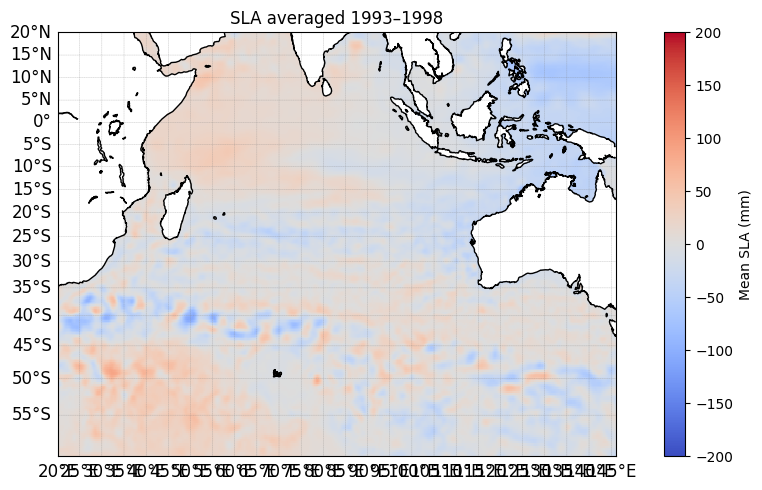

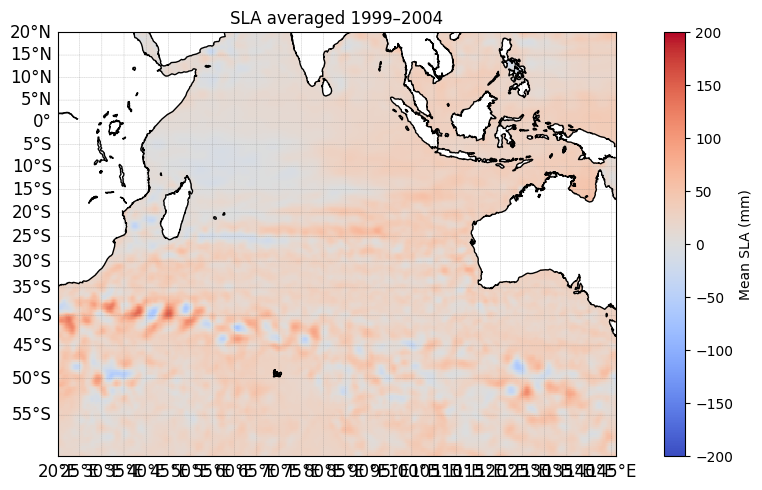

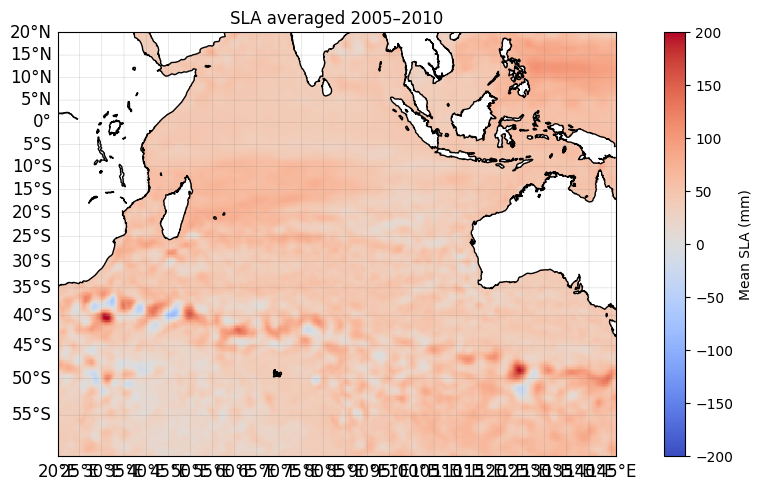

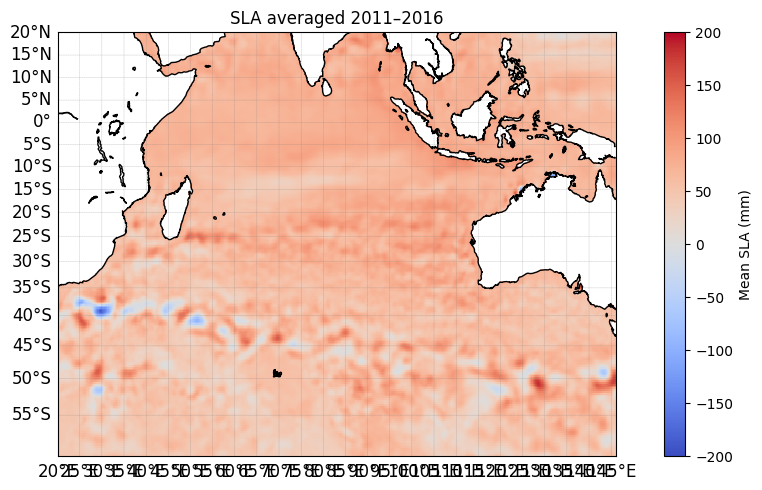

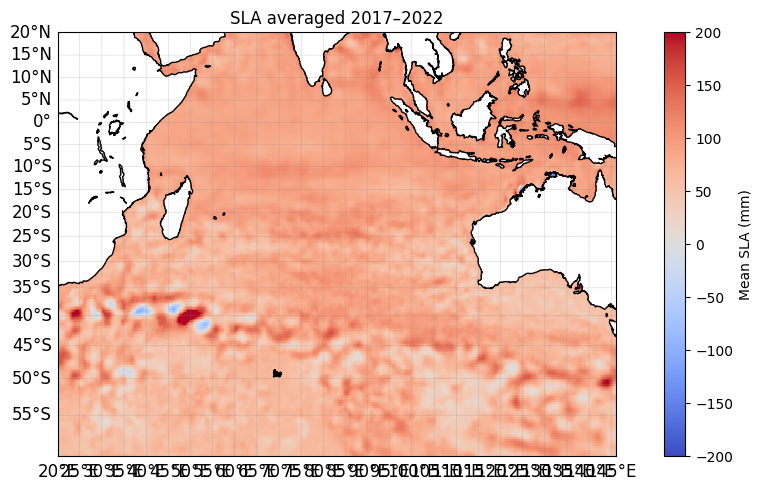

In [9]:
i0 = np.argmin(np.abs(domain[0] - lon_o))
i1 = np.argmin(np.abs(domain[1] - lon_o))
j0 = np.argmin(np.abs(domain[2] - lat_o))
j1 = np.argmin(np.abs(domain[3] - lat_o))

sla_region = sla[:, j0:j1+1, i0:i1+1]
lon_region = lon[j0:j1+1, i0:i1+1]
lat_region = lat[j0:j1+1, i0:i1+1]

# define your 6‑year bins
periods = [
    (1993, 1998),
    (1999, 2004),
    (2005, 2010),
    (2011, 2016),
    (2017, 2022),
]

for start, end in periods:
    # build boolean mask: include entire years [start, end]
    mask = (time_year >= start) & (time_year < end + 1)
    if not np.any(mask):
        print(f"No data in {start}-{end}")
        continue

    # average over time‑axis of that bin
    sla_avg = sla_region[mask, :, :].mean(axis=0)

    # plot
    fig = plt.figure(figsize=(10,5))
    m = Basemap(projection='merc',
                llcrnrlon=domain[0], urcrnrlon=domain[1],
                llcrnrlat=domain[2], urcrnrlat=domain[3],
                resolution='l')
    m.drawparallels(np.arange(-90, 90, 5), labels=[1,0,0,0],
                    color='0.5', linewidth=0.25, fontsize=12)
    m.drawmeridians(np.arange(-180, 180, 5), labels=[0,0,0,1],
                    color='0.5', linewidth=0.25, fontsize=12)
    m.drawcoastlines()

    # project
    lon_map, lat_map = m(lon_region, lat_region)
    pcm = m.pcolormesh(lon_map, lat_map, sla_avg,
                       vmin=-200, vmax=200, cmap='coolwarm')
    cbar = plt.colorbar(pcm, shrink=1.0)
    cbar.set_label('Mean SLA (mm)')
    plt.title(f"SLA averaged {start}–{end}")
    plt.tight_layout()
    plt.savefig(f"SLA_avg_{start}_{end}.png", dpi=150)
    plt.show()
    plt.close()


#  Plotting Regional SLA of Indian Ocean from 1993-2022 averaged over its entire domain

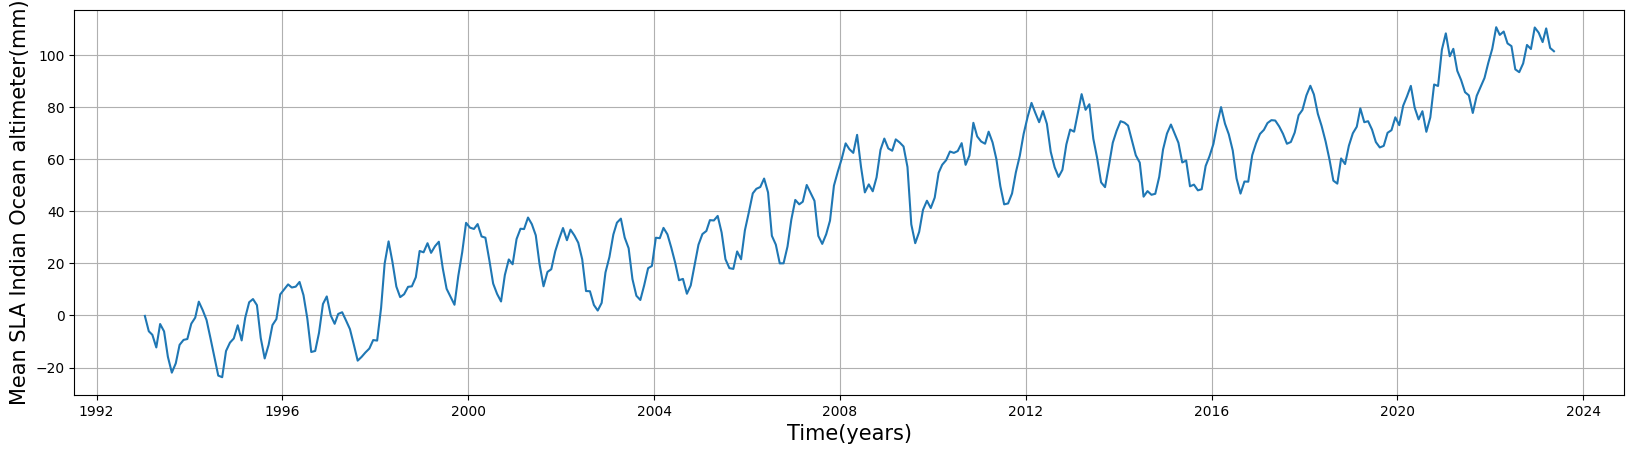

In [10]:
# Doing the mean of SLA in the region
region_sla=np.mean( sla_region,axis=(1,2) )

fig, ax = plt.subplots(figsize=(20,5))
plt.plot( time_sla, region_sla )
plt.xlabel('Time(years)',fontsize=15)
plt.ylabel('Mean SLA Indian Ocean altimeter(mm)',fontsize=15)
plt.grid('on')
plt.show()

In [11]:
######################################
# Linear-Fit
# define a line function
def func(x,a,b):
 return b*x + a


[1.43840574e+02 7.16258358e-02]
SLOPE = 3.4711938851651767


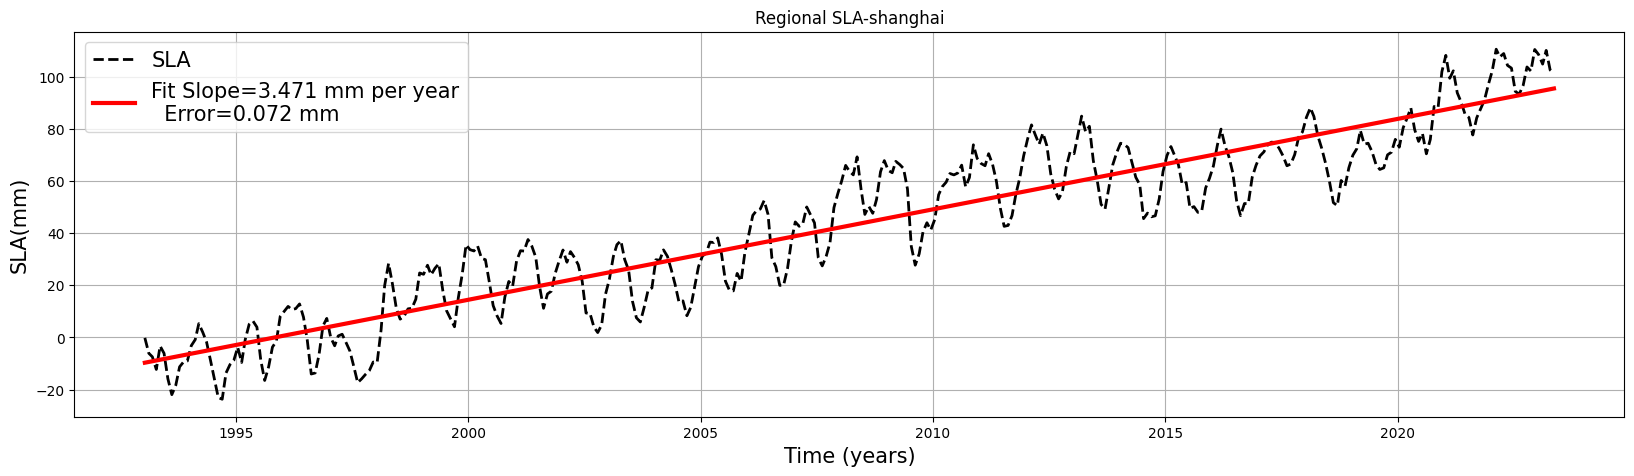

In [12]:
# Assign x and y
x = time_year
y = region_sla

params, pcov = optimize.curve_fit( func, x, y )
err = np.sqrt(np.diag(pcov))
print(err)

[a,b] = params

fit_y =  b*x + a

print('SLOPE =',b)
fig=plt.figure(figsize=(20,5))
plt.plot( x, y, 'k--', linewidth=2 )
plt.plot( x, fit_y, linewidth=3, color='r')
plt.ylabel('SLA(mm)', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.legend([ 'SLA', 'Fit Slope='+'%5.3f mm per year'%(b)+'\n  Error='+ '%5.3f mm'%(err[1]) ], fontsize=15)
plt.title('Regional SLA-shanghai')
plt.grid('on')
plt.savefig('SL_RISE_Indian_COean.jpg')
plt.show()

# Plotting SLA 'Timeseries' at a particular lon, lat (Useful for Cities)

### Colombo (Sri Lanka)

317 387


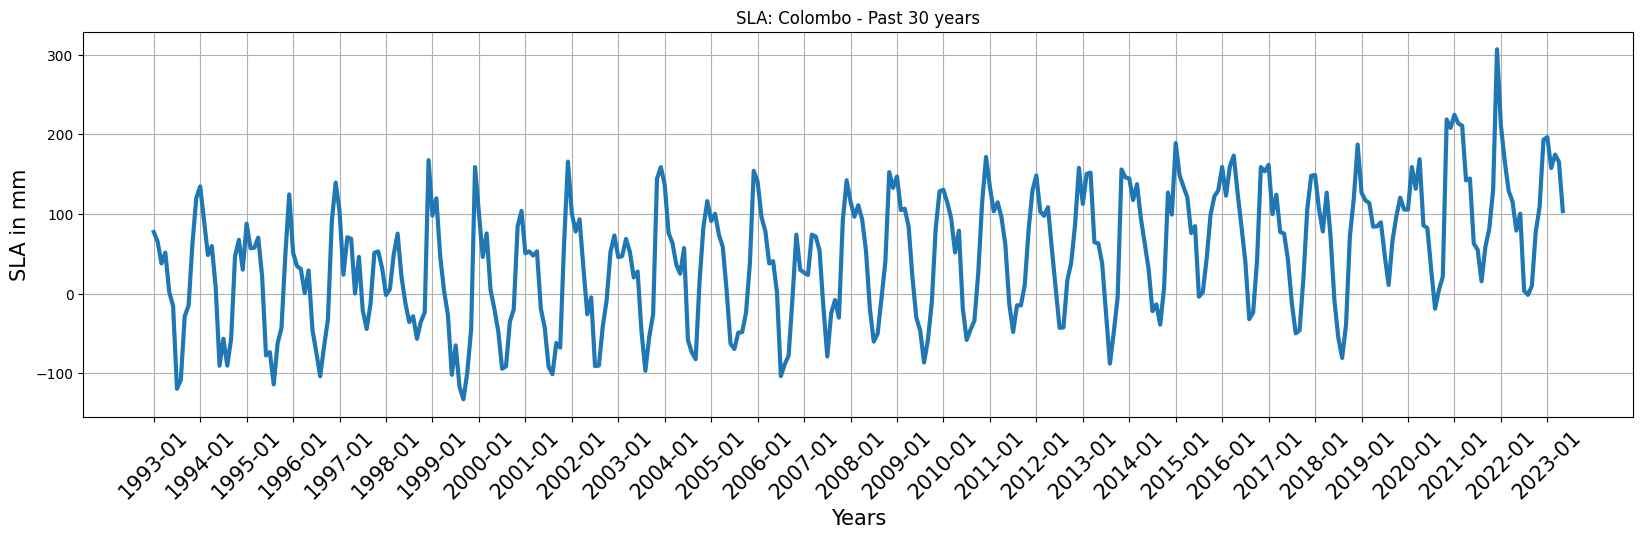

[8.63628233e+02 4.30046210e-01]
SLOPE = 3.825007968343714


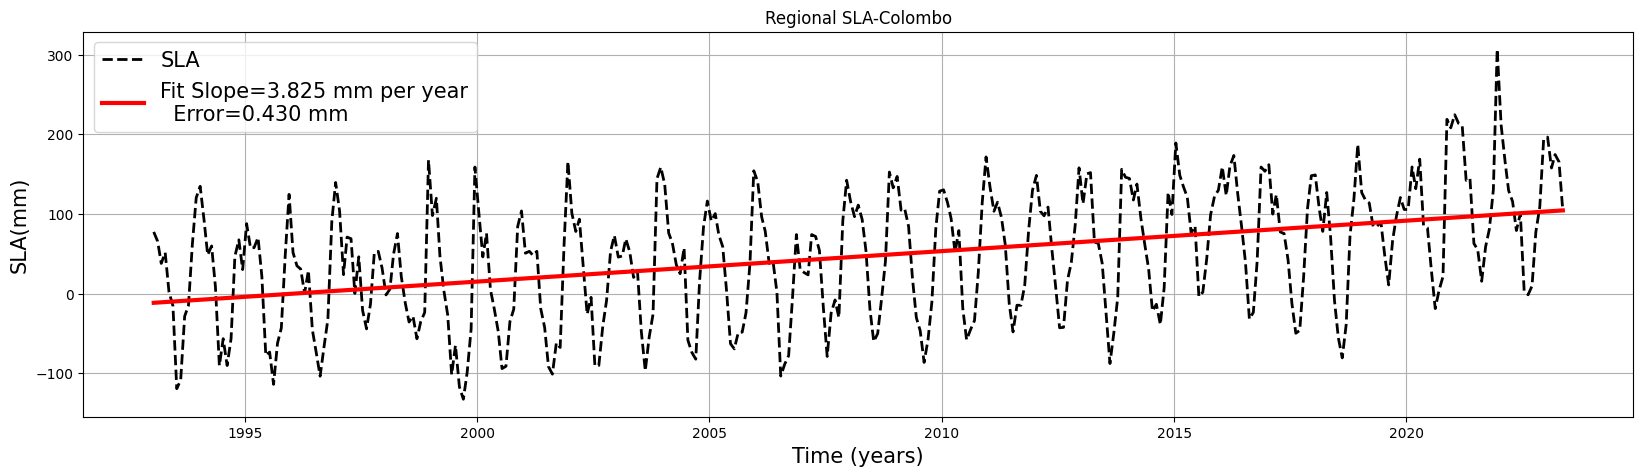

In [13]:
point=[79.5,7] # lon, lat in east, north

#------------------ PLOT SLA

## Find the index of the point in data
# index of the lon
ind_lon = np.argmin( np.abs(point[0] - lon_o) )

# index of lat
ind_lat = np.argmin( np.abs(point[1] - lat_o) )

print(ind_lon, ind_lat)

# Extract the time series at the point
sla_point = sla[:,ind_lat, ind_lon]

# Plot the time series
fig=plt.figure(figsize=(20,5))
plt.plot(time_str, sla_point, linewidth=3)
plt.ylabel('SLA in mm',fontsize=15)
plt.xlabel('Years',fontsize=15)
xdates=[ datetime(1993,1,1) + timedelta(days=365.25*t) for t in range(0,31)]
xlabels = ( [ datetime.strftime(t,'%Y-%m') for t in xdates ] )
plt.title('SLA: Colombo - Past 30 years')
plt.xticks(xlabels,rotation=45,fontsize=15)
plt.grid('on')
plt.show()

#------------------ FIT LINE

# Assign x and y
x = time_year
y = sla_point

params, pcov = optimize.curve_fit( func, x, y )
err = np.sqrt(np.diag(pcov))
print(err)

[a,b] = params

fit_y =  b*x + a

print('SLOPE =',b)
fig=plt.figure(figsize=(20,5))
plt.plot( x, y, 'k--', linewidth=2 )
plt.plot( x, fit_y, linewidth=3, color='r')
plt.ylabel('SLA(mm)', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.legend([ 'SLA', 'Fit Slope='+'%5.3f mm per year'%(b)+'\n  Error='+ '%5.3f mm'%(err[1]) ], fontsize=15)
plt.title('Regional SLA-Colombo')
plt.grid('on')
plt.savefig('SL_RISE_Colombo.jpg')
plt.show()

### Perth (Australia)

459 231


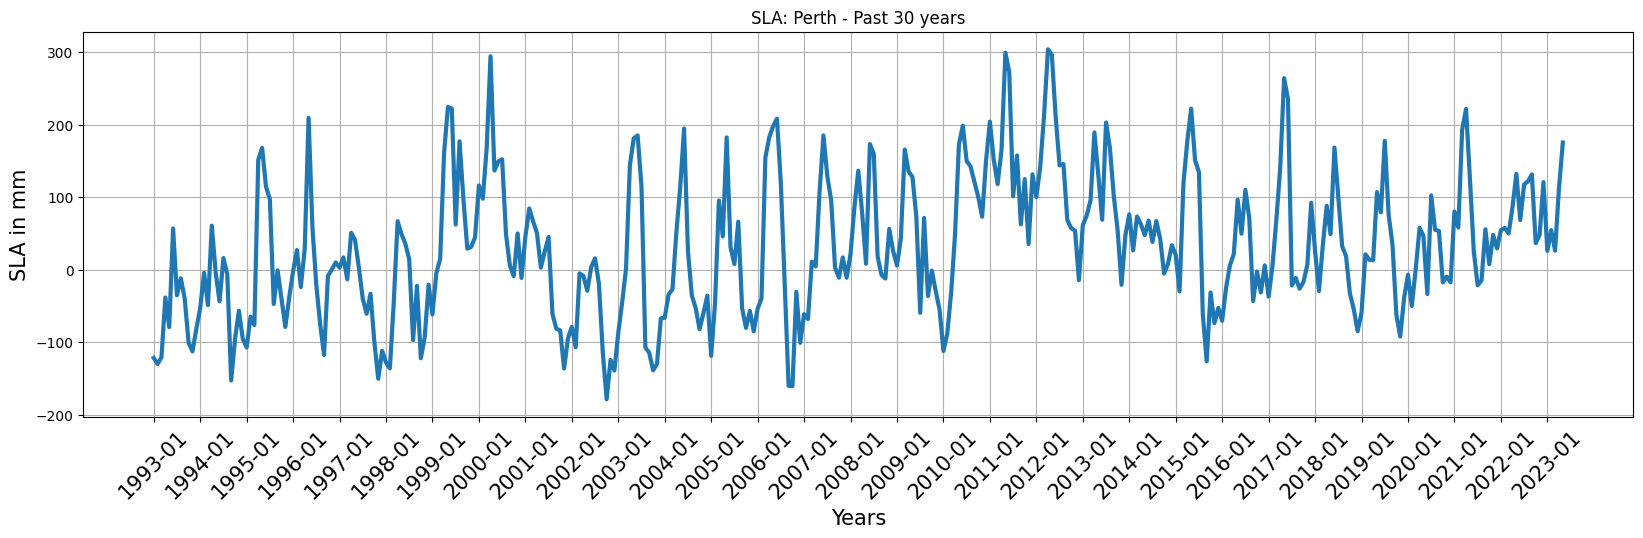

[1.09831222e+03 5.46907791e-01]
SLOPE = 3.1142042895591158


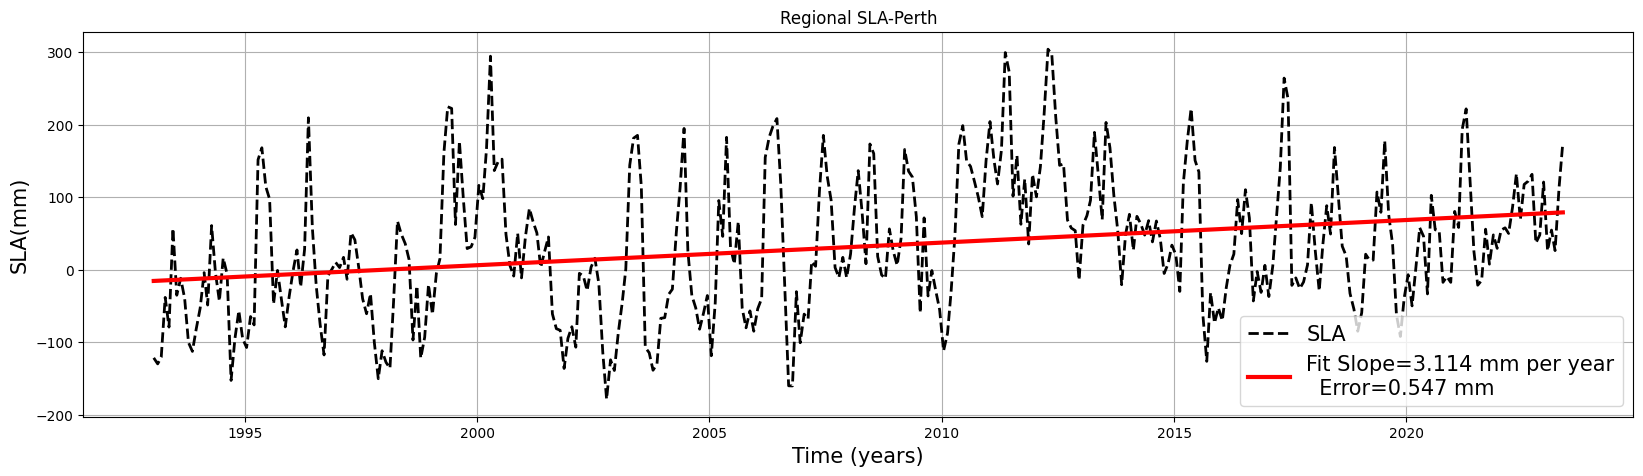

In [14]:
point=[115,-32] # lon, lat in east, north

#------------------ PLOT SLA

## Find the index of the point in data
# index of the lon
ind_lon = np.argmin( np.abs(point[0] - lon_o) )

# index of lat
ind_lat = np.argmin( np.abs(point[1] - lat_o) )

print(ind_lon, ind_lat)

# Extract the time series at the point
sla_point = sla[:,ind_lat, ind_lon]

# Plot the time series
fig=plt.figure(figsize=(20,5))
plt.plot(time_str, sla_point, linewidth=3)
plt.ylabel('SLA in mm',fontsize=15)
plt.xlabel('Years',fontsize=15)
xdates=[ datetime(1993,1,1) + timedelta(days=365.25*t) for t in range(0,31)]
xlabels = ( [ datetime.strftime(t,'%Y-%m') for t in xdates ] )
plt.title('SLA: Perth - Past 30 years')
plt.xticks(xlabels,rotation=45,fontsize=15)
plt.grid('on')
plt.show()

#------------------ FIT LINE

# Assign x and y
x = time_year
y = sla_point

params, pcov = optimize.curve_fit( func, x, y )
err = np.sqrt(np.diag(pcov))
print(err)

[a,b] = params

fit_y =  b*x + a

print('SLOPE =',b)
fig=plt.figure(figsize=(20,5))
plt.plot( x, y, 'k--', linewidth=2 )
plt.plot( x, fit_y, linewidth=3, color='r')
plt.ylabel('SLA(mm)', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.legend([ 'SLA', 'Fit Slope='+'%5.3f mm per year'%(b)+'\n  Error='+ '%5.3f mm'%(err[1]) ], fontsize=15)
plt.title('Regional SLA-Perth')
plt.grid('on')
plt.savefig('SL_RISE_Perth.jpg')
plt.show()

### Jakarta (Indonesia)

427 335


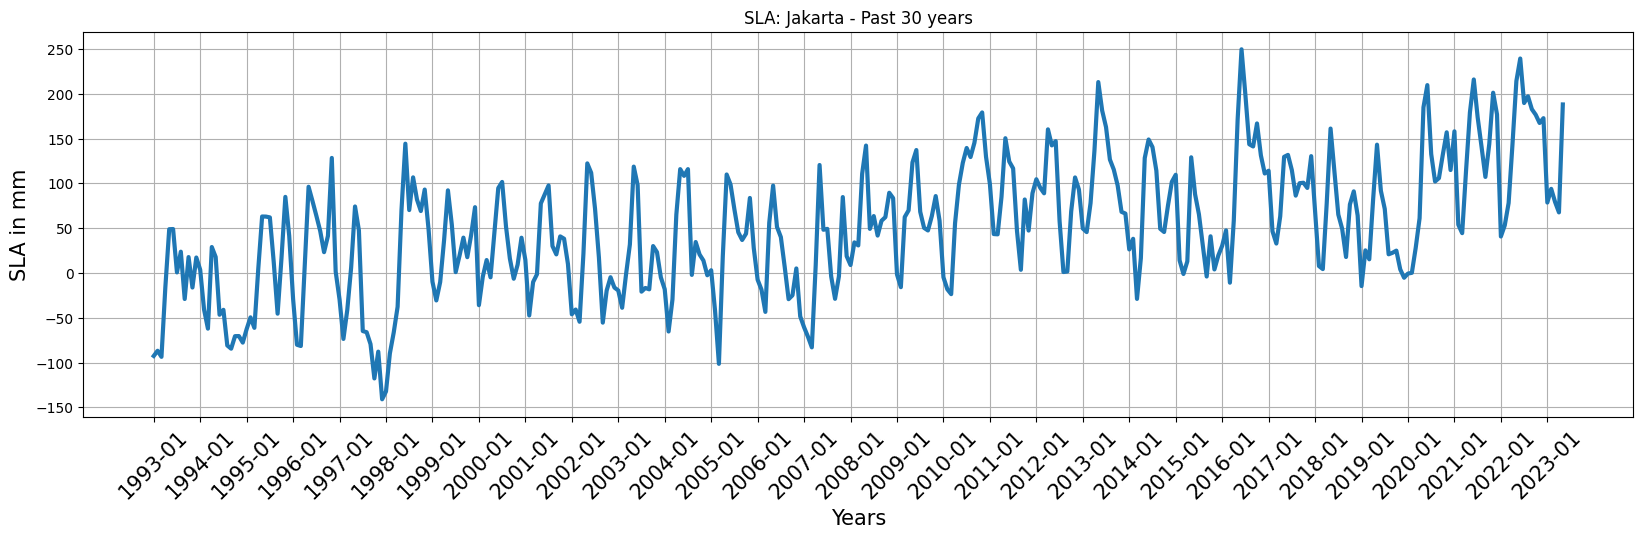

[7.08024556e+02 3.52562902e-01]
SLOPE = 4.722218797512516


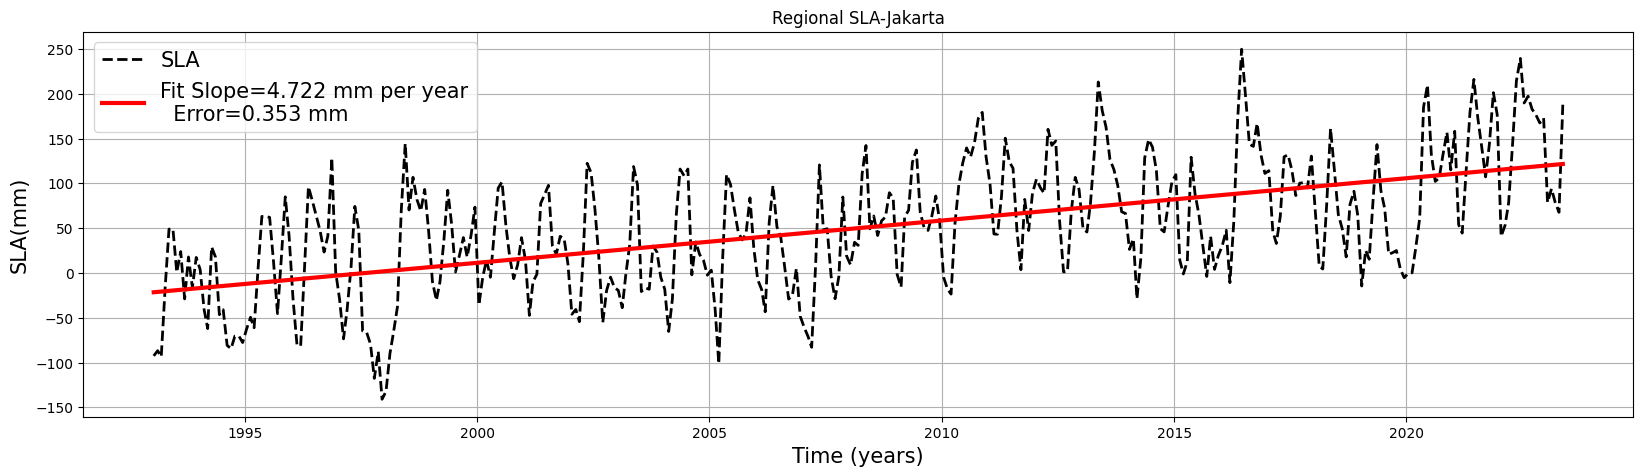

In [15]:
point=[107,-6] # lon, lat in east, north

#------------------ PLOT SLA

## Find the index of the point in data
# index of the lon
ind_lon = np.argmin( np.abs(point[0] - lon_o) )

# index of lat
ind_lat = np.argmin( np.abs(point[1] - lat_o) )

print(ind_lon, ind_lat)

# Extract the time series at the point
sla_point = sla[:,ind_lat, ind_lon]

# Plot the time series
fig=plt.figure(figsize=(20,5))
plt.plot(time_str, sla_point, linewidth=3)
plt.ylabel('SLA in mm',fontsize=15)
plt.xlabel('Years',fontsize=15)
xdates=[ datetime(1993,1,1) + timedelta(days=365.25*t) for t in range(0,31)]
xlabels = ( [ datetime.strftime(t,'%Y-%m') for t in xdates ] )
plt.title('SLA: Jakarta - Past 30 years')
plt.xticks(xlabels,rotation=45,fontsize=15)
plt.grid('on')
plt.show()

#------------------ FIT LINE

# Assign x and y
x = time_year
y = sla_point

params, pcov = optimize.curve_fit( func, x, y )
err = np.sqrt(np.diag(pcov))
print(err)

[a,b] = params

fit_y =  b*x + a

print('SLOPE =',b)
fig=plt.figure(figsize=(20,5))
plt.plot( x, y, 'k--', linewidth=2 )
plt.plot( x, fit_y, linewidth=3, color='r')
plt.ylabel('SLA(mm)', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.legend([ 'SLA', 'Fit Slope='+'%5.3f mm per year'%(b)+'\n  Error='+ '%5.3f mm'%(err[1]) ], fontsize=15)
plt.title('Regional SLA-Jakarta')
plt.grid('on')
plt.savefig('SL_RISE_Jakarta.jpg')
plt.show()

### Durban (South Africa)

123 239


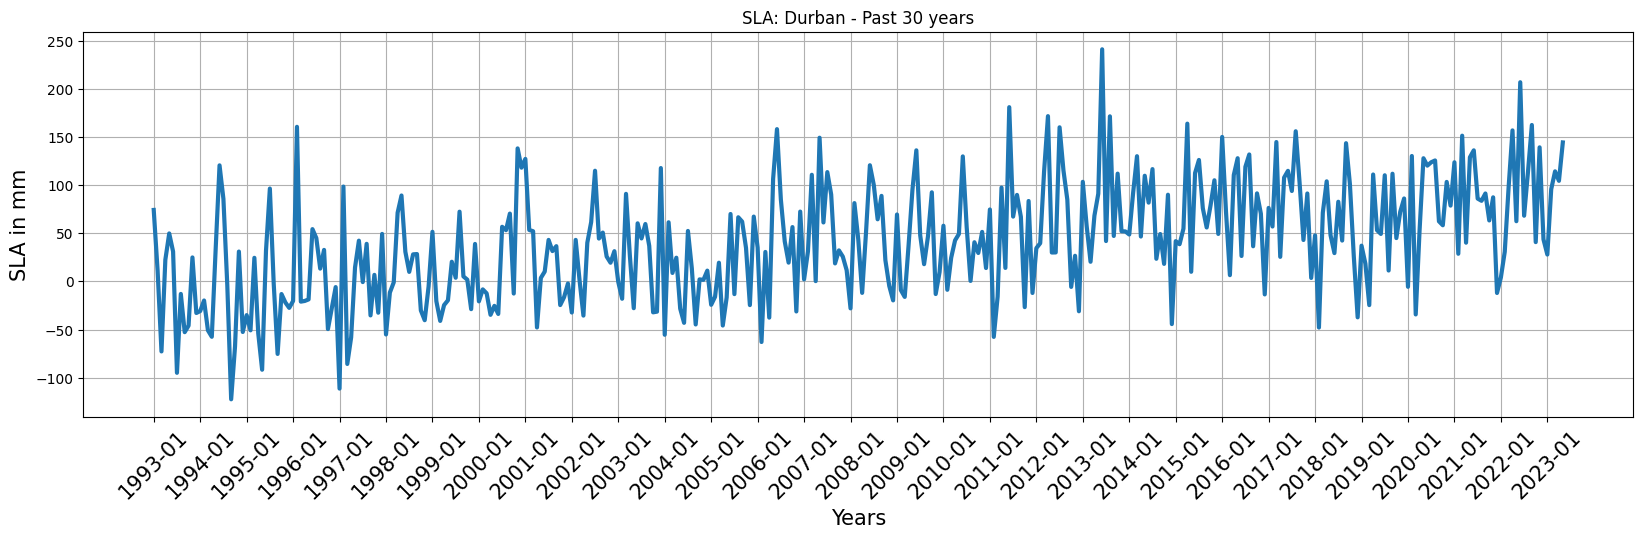

[6.17446940e+02 3.07459513e-01]
SLOPE = 3.478002154757469


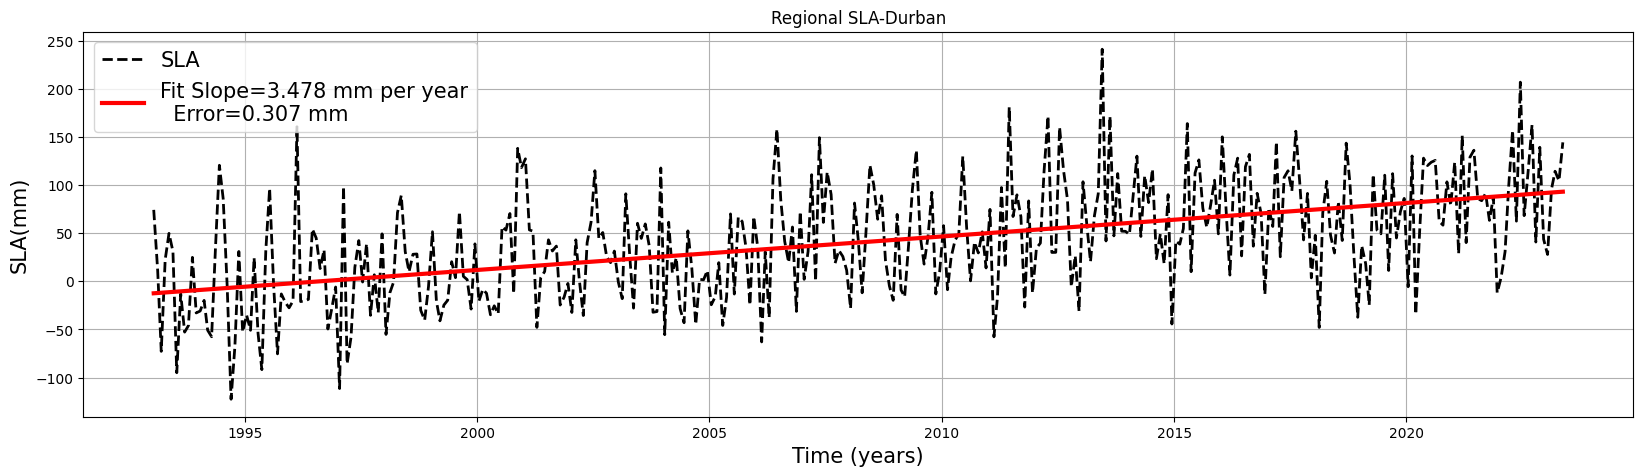

In [16]:
point=[31,-30] # lon, lat in east, north

#------------------ PLOT SLA

## Find the index of the point in data
# index of the lon
ind_lon = np.argmin( np.abs(point[0] - lon_o) )

# index of lat
ind_lat = np.argmin( np.abs(point[1] - lat_o) )

print(ind_lon, ind_lat)

# Extract the time series at the point
sla_point = sla[:,ind_lat, ind_lon]

# Plot the time series
fig=plt.figure(figsize=(20,5))
plt.plot(time_str, sla_point, linewidth=3)
plt.ylabel('SLA in mm',fontsize=15)
plt.xlabel('Years',fontsize=15)
xdates=[ datetime(1993,1,1) + timedelta(days=365.25*t) for t in range(0,31)]
xlabels = ( [ datetime.strftime(t,'%Y-%m') for t in xdates ] )
plt.title('SLA: Durban - Past 30 years')
plt.xticks(xlabels,rotation=45,fontsize=15)
plt.grid('on')
plt.show()

#------------------ FIT LINE

# Assign x and y
x = time_year
y = sla_point

params, pcov = optimize.curve_fit( func, x, y )
err = np.sqrt(np.diag(pcov))
print(err)

[a,b] = params

fit_y =  b*x + a

print('SLOPE =',b)
fig=plt.figure(figsize=(20,5))
plt.plot( x, y, 'k--', linewidth=2 )
plt.plot( x, fit_y, linewidth=3, color='r')
plt.ylabel('SLA(mm)', fontsize=15)
plt.xlabel('Time (years)', fontsize=15)
plt.legend([ 'SLA', 'Fit Slope='+'%5.3f mm per year'%(b)+'\n  Error='+ '%5.3f mm'%(err[1]) ], fontsize=15)
plt.title('Regional SLA-Durban')
plt.grid('on')
plt.savefig('SL_RISE_Durban.jpg')
plt.show()

# Plotting monthly SST for Indian Ocean from 1993-2022

In [18]:
import xarray as xr
DS = xr.open_dataset("indian_ocean_sst.nc")
df = DS.to_dataframe()

# 2) (Optional) write it out
df.to_csv("indian_ocean_sst.csv", index=True)

# 3) Now you can inspect the columns
print(df.columns)

Index(['to'], dtype='object')


In [19]:
df

to
time       depth latitude longitude           
1993-01-01 -0.0  -30.125  53.625     25.611000
                          53.875     25.591000
                          54.125     25.667999
                          54.375     25.812000
                          54.625     25.941000
...                                        ...
2022-12-01 -0.0   2.625   95.125     28.569000
                          95.375     28.716999
                          95.625     28.770000
                          95.875     29.424000
                          96.125     29.351000

[8125920 rows x 1 columns]

In [20]:
# Compute the monthly spatial mean: group by time index level
monthly_mean = df['to'].groupby(level='time').mean()
monthly_mean

,to
time,
1993-01-01,27.171066
1993-02-01,27.451887
1993-03-01,27.437696
1993-04-01,27.280676
1993-05-01,26.794901
...,...
2022-08-01,24.693453
2022-09-01,24.813145
2022-10-01,25.143997


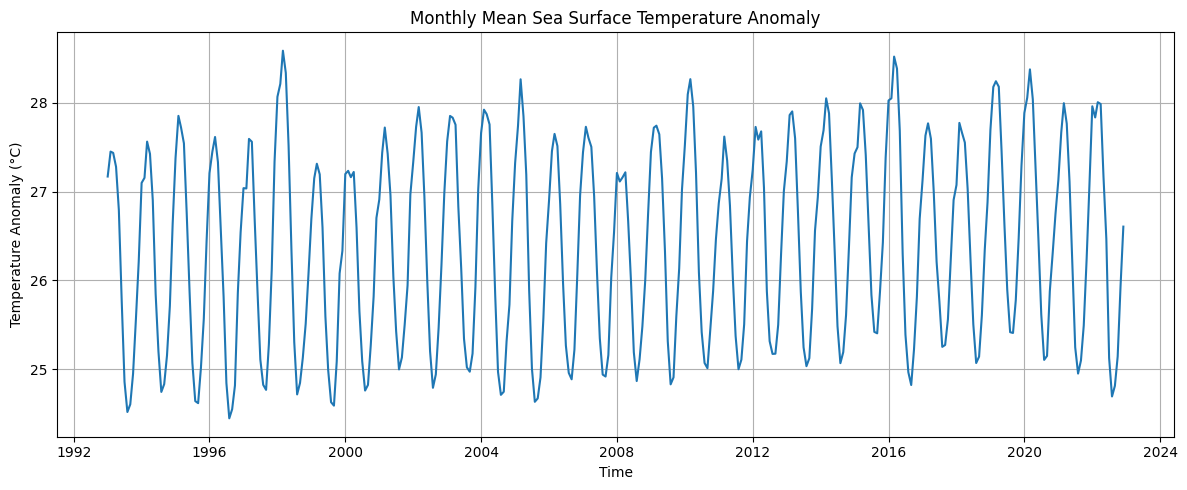

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_mean.index, monthly_mean.values)
plt.title("Monthly Mean Sea Surface Temperature Anomaly")
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting monthly sea surface salinity for Indian Ocean from 1993-2022

In [22]:
# import xarray as xr
# DS = xr.open_dataset("indian_ocean_sal.nc")
# DS.to_dataframe().to_csv("indian_ocean_sal.csv")
import xarray as xr
DS = xr.open_dataset("indian_ocean_salinity.nc")
df_sal = DS.to_dataframe()

# 2) (Optional) write it out
df_sal.to_csv("indian_ocean_salinity.csv", index=True)

# 3) Now you can inspect the columns
print(df_sal.columns)

Index(['so'], dtype='object')


In [23]:
df

to
time       depth latitude longitude           
1993-01-01 -0.0  -30.125  53.625     25.611000
                          53.875     25.591000
                          54.125     25.667999
                          54.375     25.812000
                          54.625     25.941000
...                                        ...
2022-12-01 -0.0   2.625   95.125     28.569000
                          95.375     28.716999
                          95.625     28.770000
                          95.875     29.424000
                          96.125     29.351000

[8125920 rows x 1 columns]

In [24]:
# Compute the monthly spatial mean: group by time index level
monthly_mean_sal = df_sal['so'].groupby(level='time').mean()

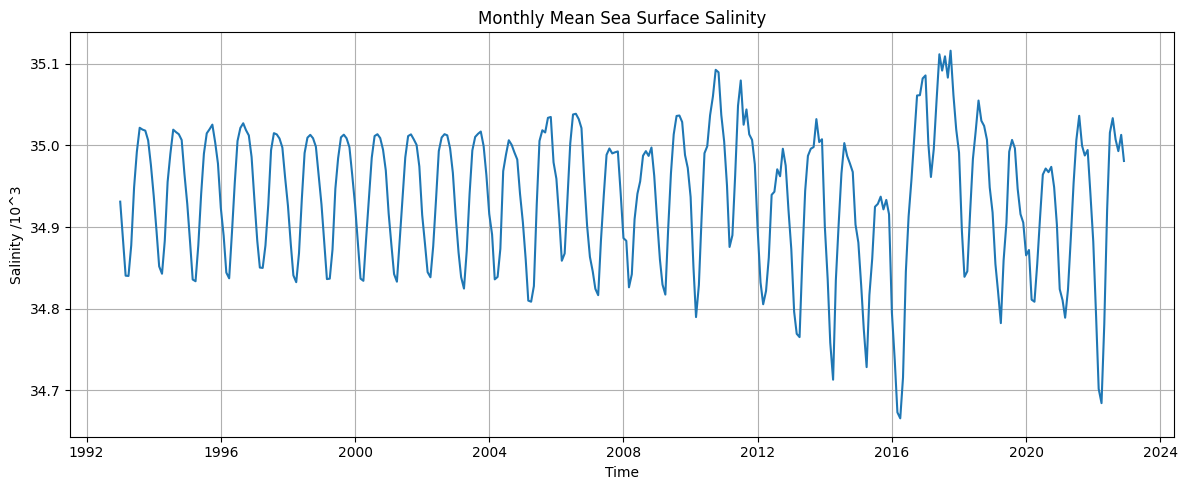

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_mean_sal.index, monthly_mean_sal.values)
plt.title("Monthly Mean Sea Surface Salinity")
plt.xlabel("Time")
plt.ylabel("Salinity /10^3")
plt.grid(True)
plt.tight_layout()
plt.show()


# Projected Economic Losses due to Sea Level Rise

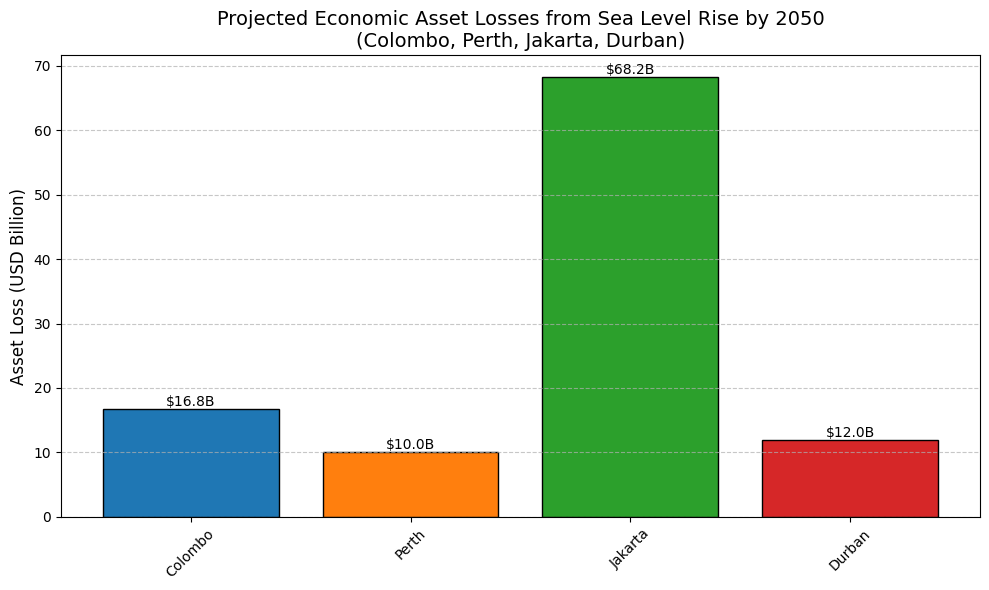

In [26]:
import matplotlib.pyplot as plt

# Projected economic asset losses due to sea level rise (scenario-dependent horizons)
# Data
cities = ['Colombo', 'Perth', 'Jakarta', 'Durban']
losses = [16.8, 10.0, 68.2, 12]  # USD Billion
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cities, losses, color=colors, edgecolor='black')

# Add values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height}B', ha='center', va='bottom')

plt.title('Projected Economic Asset Losses from Sea Level Rise by 2050\n(Colombo, Perth, Jakarta, Durban)', fontsize=14)
plt.ylabel('Asset Loss (USD Billion)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
from tabulate import tabulate

cities = ['Colombo', 'Perth', 'Jakarta', 'Durban']
slr_scenarios = ['+0.5m', '+0.3m', '+2.5m', '+0.28m']
asset_losses = [16.8, 10.0, 68.2, 12]     # USD B
gdp_impacts   = [1.2, 8.0, 18, 14]      # % of city/metro GDP

# Build DataFrame
df = pd.DataFrame({
    'Location':           cities,
    'SLR Scenario by 2050':       slr_scenarios,
    'Asset Loss (USD B)': asset_losses,
    'GDP Impact (%)':     gdp_impacts
})

# Print formatted table
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


+----------+----------------------+--------------------+----------------+
| Location | SLR Scenario by 2050 | Asset Loss (USD B) | GDP Impact (%) |
+----------+----------------------+--------------------+----------------+
| Colombo  |        +0.5m         |        16.8        |      1.2       |
|  Perth   |        +0.3m         |        10.0        |      8.0       |
| Jakarta  |        +2.5m         |        68.2        |      18.0      |
|  Durban  |        +0.28m        |        12.0        |      14.0      |
+----------+----------------------+--------------------+----------------+
